# INTEGRANTES:


*   Benjamin Arias Fuentes
*   Eder Perez
*   Sebastian Salazar Perez




**Flujo de trabajo para el desarrollo de IA**

1.   Importar librerías (Herramientas necesarias) y cargar DataSet (DS)
2.   EDA - Análisis Exploratorio de Datos
  Feature Engineering
  *   Variables Independientes (x)
  *   Variable Dependiente (y) o Target
  *   ¿Qué elementos dejo en el DataSet?


3.   División de Datos

  *   Datos para entrenar modelo (X_train, Y_train)
  *   Datos para probar modelo (X_test, Y_test)


4.   **ENTRENAR** - Construyo y entreno el modelo con X_train y Y_train
5.   **EVALUAMO MODELO** - Usamos X_test y Y_test

  *   Pruebo varios algoritmos
  *   Genero Métricas -> **%Accuracy**













In [ ]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Para generación de datos sintéticos
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#Modelos
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#Para clasificación
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Para regresión
from sklearn.metrics import r2_score

**Cragamos el DataSet**

# **Análisis exploratorio de datos - EDA**

# **Por incovenientes con el fromato de fecha en el uso de los modelos cambiamos a un DataSet con datos de partidos de la NBA desde 2003 hasta 2022, también se hace uso de un DataSet para el nombramiento de los equipos que hacen uso de un ID para su identificación**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Leer los DataSet
partidos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/games.csv')
equipos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/teams.csv')

In [ ]:
#Observamos y analizamos el DataSet de los partidos
partidos.info()
partidos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [ ]:
#Eliminamos las columnas repetidas o que no aportan información valiosa
partidos_dp = partidos.drop(columns=["GAME_STATUS_TEXT", "TEAM_ID_home", "GAME_ID", "TEAM_ID_away"])
partidos_dp.head()

,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,1610612740,1610612759,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,1610612762,1610612764,2022,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,1610612739,1610612749,2022,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,1610612755,1610612765,2022,113.0,0.441,0.909,0.297,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,1610612737,1610612741,2022,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0


In [ ]:
#Observamos y analizamos el DataSet de los equipos
equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEAGUE_ID           30 non-null     int64  
 1   TEAM_ID             30 non-null     int64  
 2   MIN_YEAR            30 non-null     int64  
 3   MAX_YEAR            30 non-null     int64  
 4   ABBREVIATION        30 non-null     object 
 5   NICKNAME            30 non-null     object 
 6   YEARFOUNDED         30 non-null     int64  
 7   CITY                30 non-null     object 
 8   ARENA               30 non-null     object 
 9   ARENACAPACITY       26 non-null     float64
 10  OWNER               30 non-null     object 
 11  GENERALMANAGER      30 non-null     object 
 12  HEADCOACH           30 non-null     object 
 13  DLEAGUEAFFILIATION  30 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ KB


In [ ]:
# Crear un diccionario de mapeo TEAM_ID a NICKNAME
team_mapping = dict(zip(equipos['TEAM_ID'], equipos['NICKNAME']))

# Reemplazamos HOME_TEAM_ID y VISITOR_TEAM_ID por los nombres de los equipos
partidos_dp['HOME_TEAM'] = partidos_dp['HOME_TEAM_ID'].map(team_mapping)
partidos_dp['VISITOR_TEAM'] = partidos_dp['VISITOR_TEAM_ID'].map(team_mapping)

# Eliminamos las columnas originales de ID
partidos_dp = partidos_dp.drop(columns=['HOME_TEAM_ID', 'VISITOR_TEAM_ID'])

# Reordenamos las columnas para que HOME_TEAM y VISITOR_TEAM estén al inicio del DataSet
columns_order = ['GAME_DATE_EST', 'HOME_TEAM', 'VISITOR_TEAM', 'SEASON', 'PTS_home', 'FG_PCT_home',
                 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away',
                 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']
partidos_dp = partidos_dp[columns_order]




In [ ]:
#Visualizamos el nuevo DataSet después de la depuración de datos
partidos_dp.head()

,GAME_DATE_EST,HOME_TEAM,VISITOR_TEAM,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,Pelicans,Spurs,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,Jazz,Wizards,2022,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,Cavaliers,Bucks,2022,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,76ers,Pistons,2022,113.0,0.441,0.909,0.297,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,Hawks,Bulls,2022,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0


In [ ]:
#Contamos los valores nulos por columna
print("Valores nulos por columna antes de la limpieza:")
print(partidos_dp.isnull().sum())

Valores nulos por columna antes de la limpieza:
GAME_DATE_EST      0
HOME_TEAM          0
VISITOR_TEAM       0
SEASON             0
PTS_home          99
FG_PCT_home       99
FT_PCT_home       99
FG3_PCT_home      99
AST_home          99
REB_home          99
PTS_away          99
FG_PCT_away       99
FT_PCT_away       99
FG3_PCT_away      99
AST_away          99
REB_away          99
HOME_TEAM_WINS     0
dtype: int64


In [ ]:
# Eliminamos todas las filas que contengan al menos un valor nulo
partidos_clean = partidos_dp.dropna()

# Contar valores nulos después de la limpieza para verificar
print("\nValores nulos por columna después de la limpieza:")
print(partidos_clean.isnull().sum())


Valores nulos por columna después de la limpieza:
GAME_DATE_EST     0
HOME_TEAM         0
VISITOR_TEAM      0
SEASON            0
PTS_home          0
FG_PCT_home       0
FT_PCT_home       0
FG3_PCT_home      0
AST_home          0
REB_home          0
PTS_away          0
FG_PCT_away       0
FT_PCT_away       0
FG3_PCT_away      0
AST_away          0
REB_away          0
HOME_TEAM_WINS    0
dtype: int64


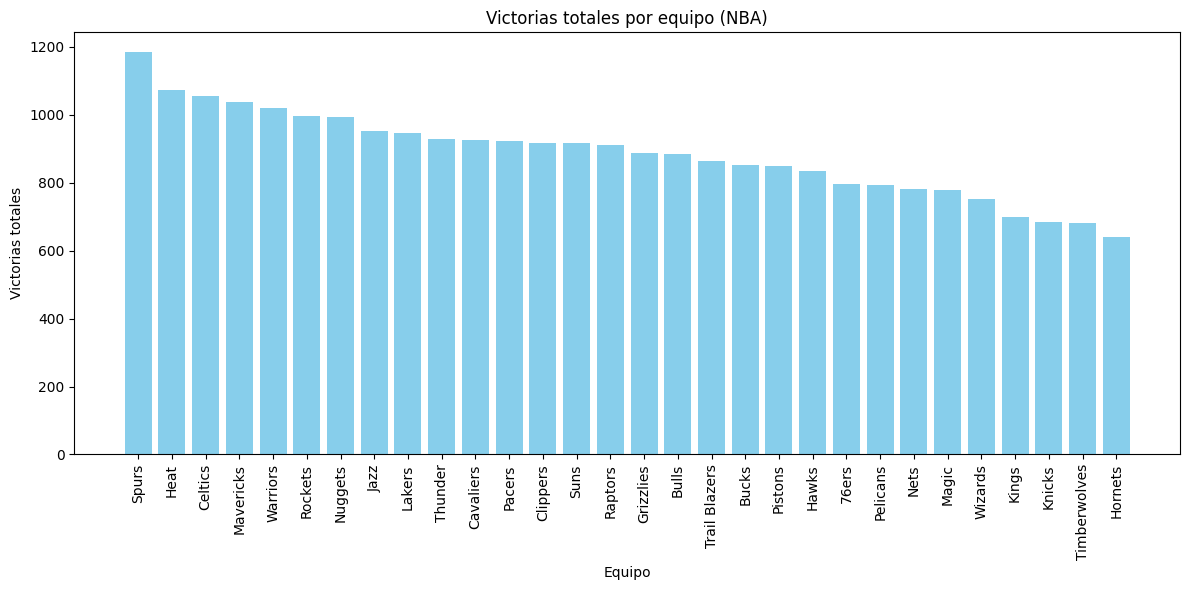

             Team  Wins
20          Spurs  1183
9            Heat  1073
1         Celtics  1055
4       Mavericks  1037
29       Warriors  1020
6         Rockets   996
5         Nuggets   994
23           Jazz   952
8          Lakers   947
21        Thunder   928
28      Cavaliers   924
15         Pacers   922
7        Clippers   917
17           Suns   916
22        Raptors   911
24      Grizzlies   886
3           Bulls   885
18  Trail Blazers   865
10          Bucks   852
26        Pistons   848
0           Hawks   834
16          76ers   797
2        Pelicans   792
12           Nets   782
14          Magic   779
25        Wizards   751
19          Kings   699
13         Knicks   685
11   Timberwolves   682
27        Hornets   640


In [ ]:
# Contamos las victorias como local (HOME_TEAM_WINS == 1)
home_wins = partidos_clean[partidos_clean['HOME_TEAM_WINS'] == 1]['HOME_TEAM'].value_counts()

# Contamos las victorias como visitante (HOME_TEAM_WINS == 0)
visitor_wins = partidos_clean[partidos_clean['HOME_TEAM_WINS'] == 0]['VISITOR_TEAM'].value_counts()

# Obtenemos la lista de los 30 equipos del dataset 'teams.csv'

all_teams = equipos['NICKNAME'].tolist()

# Creamos un diccionario para las victorias totales, inicializado en 0
total_wins = {team: 0 for team in all_teams}

# Sumamos las victorias como local
for team, wins in home_wins.items():
    total_wins[team] = total_wins.get(team, 0) + wins

# Sumamos las victorias como visitante
for team, wins in visitor_wins.items():
    total_wins[team] = total_wins.get(team, 0) + wins

# Convertimos a un DataFrame para graficar
wins_df = pd.DataFrame(list(total_wins.items()), columns=['Team', 'Wins'])

# Ordenamos por número de victorias (de mayor a menor)
wins_df = wins_df.sort_values(by='Wins', ascending=False)

# Creamos el diagrama de barras
plt.figure(figsize=(12, 6))
plt.bar(wins_df['Team'], wins_df['Wins'], color='skyblue')
plt.xticks(rotation=90)  # Rotamos las etiquetas para que se puedas leer
plt.xlabel('Equipo')
plt.ylabel('Victorias totales')
plt.title('Victorias totales por equipo (NBA)')
plt.tight_layout()

# Mostramos el gráfico
plt.show()

# Imprimimos las victorias totales por equipo para tener el dato a la mano
print(wins_df)

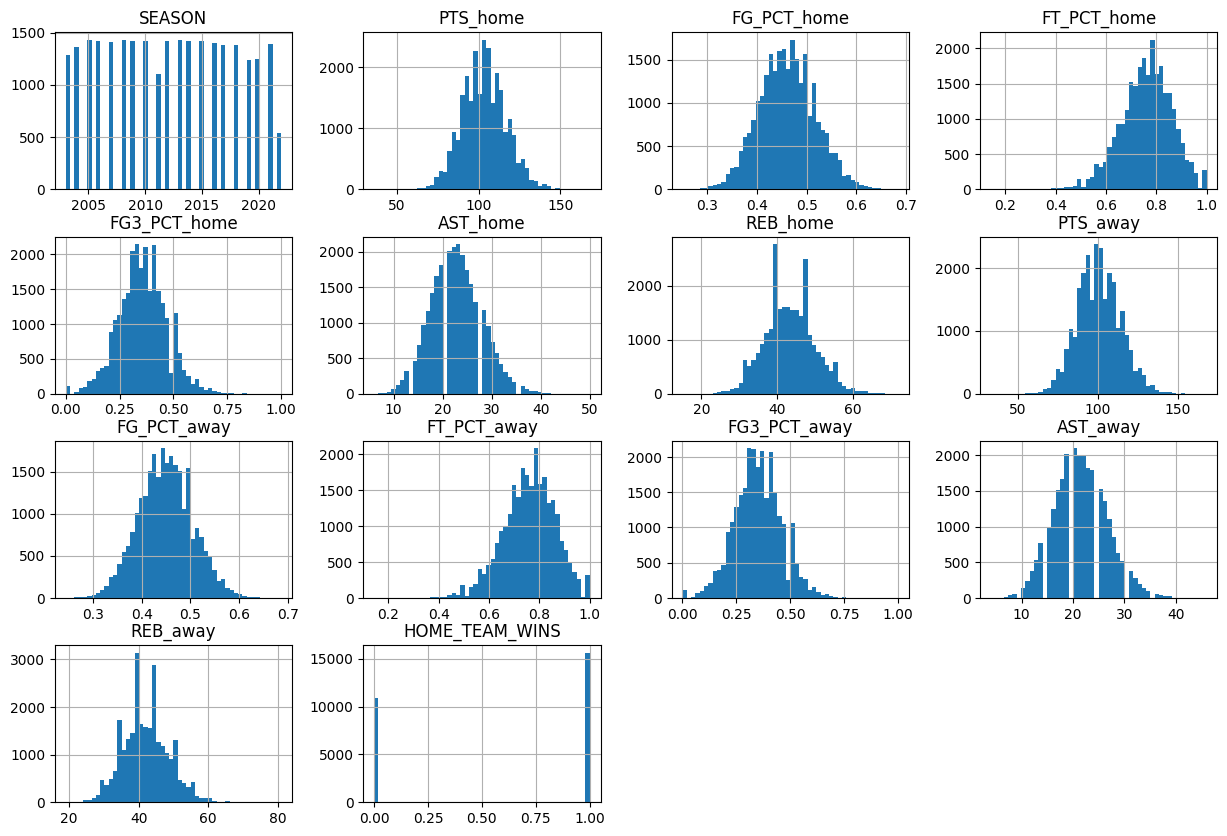

In [ ]:
partidos_clean.hist(bins=50, figsize=(15,10))
plt.show()

# Balanceo de datos

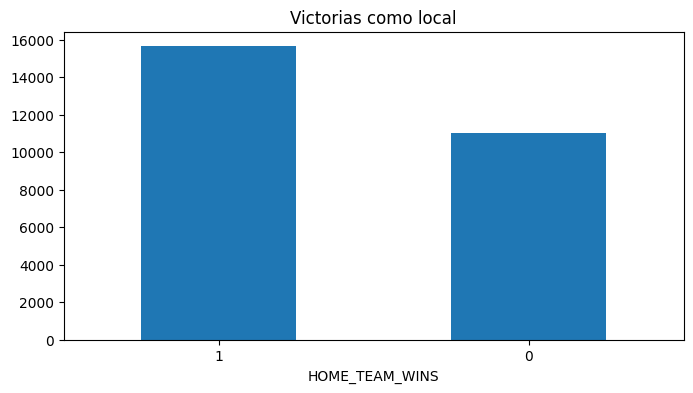

In [ ]:
# Eliminamos columnas no numéricas que no necesitas para el modelo (fecha no lo maneja la librería)
partidos_clean = partidos_clean.drop(columns=['GAME_DATE_EST'])

# Análisis de la distribución de la variable objetivo
plt.figure(figsize=(8, 4))
partidos_dp["HOME_TEAM_WINS"].value_counts().plot(kind="bar", title="Victorias como local")
plt.xticks(rotation = 0)
plt.show()

In [ ]:
class_distribution = partidos_dp["HOME_TEAM_WINS"].value_counts()
print("Distribución de clases antes del balanceo:")
print(class_distribution)


Distribución de clases antes del balanceo:
HOME_TEAM_WINS
1    15645
0    11006
Name: count, dtype: int64


In [ ]:
#Eliminar la casilla "season" y "GAME_DATE_EST"para evitar que cree columnas con fechas
partidos_dp = partidos_dp.drop(columns=["SEASON","GAME_DATE_EST"]) #Eliminar la columna SEASON
partidos_dp.head(10)

,HOME_TEAM,VISITOR_TEAM,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,Pelicans,Spurs,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,Jazz,Wizards,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
2,Cavaliers,Bucks,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
3,76ers,Pistons,113.0,0.441,0.909,0.297,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1
4,Hawks,Bulls,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0
5,Celtics,Pacers,112.0,0.386,0.840,0.317,26.0,62.0,117.0,0.469,0.778,0.462,27.0,47.0,0
6,Nets,Warriors,143.0,0.643,0.875,0.636,42.0,32.0,113.0,0.494,0.760,0.364,32.0,36.0,1
7,Knicks,Raptors,106.0,0.553,0.611,0.423,25.0,38.0,113.0,0.447,0.909,0.265,17.0,38.0,0
8,Rockets,Magic,110.0,0.466,0.647,0.395,22.0,49.0,116.0,0.451,0.697,0.297,19.0,45.0,0
9,Timberwolves,Mavericks,99.0,0.494,0.700,0.267,23.0,39.0,104.0,0.453,0.852,0.333,17.0,39.0,0


In [ ]:
# Verificar que no hay nulos en el DataFrame original
print("Valores nulos en partidos_dp antes de cualquier transformación:")
print(partidos_clean.isnull().sum())

Valores nulos en partidos_dp antes de cualquier transformación:
HOME_TEAM         0
VISITOR_TEAM      0
SEASON            0
PTS_home          0
FG_PCT_home       0
FT_PCT_home       0
FG3_PCT_home      0
AST_home          0
REB_home          0
PTS_away          0
FG_PCT_away       0
FT_PCT_away       0
FG3_PCT_away      0
AST_away          0
REB_away          0
HOME_TEAM_WINS    0
dtype: int64


In [ ]:
# Convertir variables categóricas en numéricas
partidos_encoded = pd.get_dummies(partidos_dp, drop_first=True)
partidos_encoded = partidos_encoded.dropna()

# Verificar nulos después de get_dummies
print("\nValores nulos en partidos_encoded después de get_dummies:")
#print(partidos_encoded.isnull().sum())
print(partidos_encoded.shape)  # (número de filas, número de columnas)
partidos_encoded.head(10)


Valores nulos en partidos_encoded después de get_dummies:
(26552, 71)


,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,...,VISITOR_TEAM_Pistons,VISITOR_TEAM_Raptors,VISITOR_TEAM_Rockets,VISITOR_TEAM_Spurs,VISITOR_TEAM_Suns,VISITOR_TEAM_Thunder,VISITOR_TEAM_Timberwolves,VISITOR_TEAM_Trail Blazers,VISITOR_TEAM_Warriors,VISITOR_TEAM_Wizards
0,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,...,False,False,False,True,False,False,False,False,False,False
1,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,...,False,False,False,False,False,False,False,False,False,True
2,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,...,False,False,False,False,False,False,False,False,False,False
3,113.0,0.441,0.909,0.297,27.0,49.0,93.0,0.392,0.735,0.261,...,True,False,False,False,False,False,False,False,False,False
4,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,...,False,False,False,False,False,False,False,False,False,False
5,112.0,0.386,0.840,0.317,26.0,62.0,117.0,0.469,0.778,0.462,...,False,False,False,False,False,False,False,False,False,False
6,143.0,0.643,0.875,0.636,42.0,32.0,113.0,0.494,0.760,0.364,...,False,False,False,False,False,False,False,False,True,False
7,106.0,0.553,0.611,0.423,25.0,38.0,113.0,0.447,0.909,0.265,...,False,True,False,False,False,False,False,False,False,False
8,110.0,0.466,0.647,0.395,22.0,49.0,116.0,0.451,0.697,0.297,...,False,False,False,False,False,False,False,False,False,False
9,99.0,0.494,0.700,0.267,23.0,39.0,104.0,0.453,0.852,0.333,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# funcion time para medir tiempo de ejecucion de bloque de codigo en colab
%%time
# Definir variables predictoras y la variable objetivo
X = partidos_encoded.drop(columns=["HOME_TEAM_WINS"])
y = partidos_encoded["HOME_TEAM_WINS"]

# Opción 3: Combinación de SMOTE y Tomek links
smote_tomek = SMOTETomek(random_state=42)
X_combined, y_combined = smote_tomek.fit_resample(X, y)
"""
#Intento de optimizar la funcion
under_sampler = RandomUnderSampler(sampling_strategy=0.7, random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y)

smote_tomek = SMOTETomek(random_state=42, n_jobs=-1)
X_combined, y_combined = smote_tomek.fit_resample(X_under, y_under)
"""
data_balanced = pd.DataFrame(X_combined, columns=X.columns)
data_balanced["HOME_TEAM_WINS"] = y_combined  # Agregar la variable objetivo balanceada reemplazando la anterior
print("Número de muestras después de SMOTE + Tomek:", len(y_combined))
print("Distribución después de SMOTE + Tomek:")
print(pd.Series(y_combined).value_counts())

Número de muestras después de SMOTE + Tomek: 31160
Distribución después de SMOTE + Tomek:
HOME_TEAM_WINS
1    15580
0    15580
Name: count, dtype: int64
CPU times: user 11.6 s, sys: 51.3 ms, total: 11.6 s
Wall time: 11.7 s


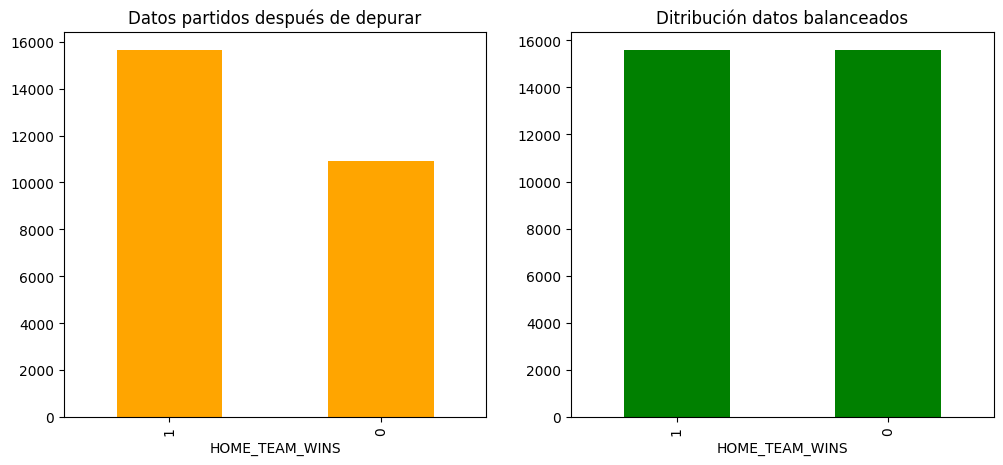

In [ ]:
# Comparar dataset original para asegurar que no cambió
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
partidos_clean["HOME_TEAM_WINS"].value_counts().plot(kind="bar", ax=ax[0], color='orange', title="Datos partidos después de depurar")
data_balanced["HOME_TEAM_WINS"].value_counts().plot(kind="bar", ax=ax[1], color='green', title="Ditribución datos balanceados")
plt.show()

In [ ]:
#hago un nuevo dataset como una copia de enconded para hacer UNICAMENTE correlaciones
df_labeled = partidos_encoded.copy()
# Dejo solo las primeras 14 columnas para poder hacer la matriz de correlacion
df_labeled = df_labeled.iloc[:, :13]
# Elimino la columna season para que solo queden variable numericas
df_labeled.head()

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
2,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
3,113.0,0.441,0.909,0.297,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1
4,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0


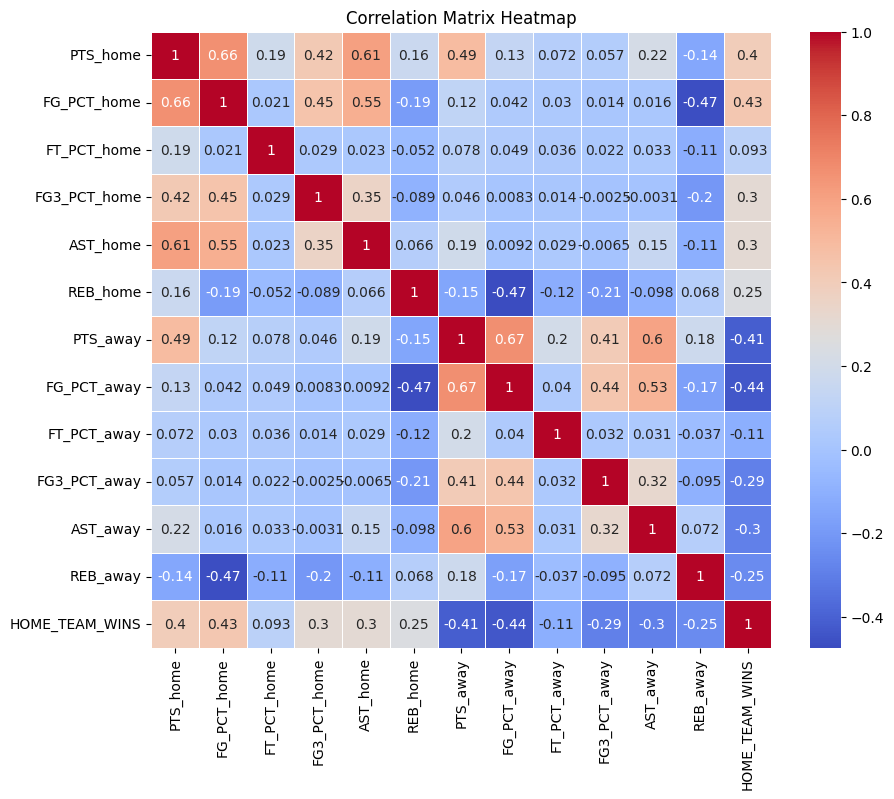

In [ ]:
#Se realiza la matriz de correlacion
correlation_matrix = df_labeled.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#Selección de la caracteristica o función objetivo y el resto de los datos
X = data_balanced.drop(['HOME_TEAM_WINS', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home','REB_home', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away','REB_away'],axis=1)
y = data_balanced['HOME_TEAM_WINS']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
X.head(5)

,PTS_home,FG_PCT_home,PTS_away,FG_PCT_away,HOME_TEAM_Bucks,HOME_TEAM_Bulls,HOME_TEAM_Cavaliers,HOME_TEAM_Celtics,HOME_TEAM_Clippers,HOME_TEAM_Grizzlies,...,VISITOR_TEAM_Pistons,VISITOR_TEAM_Raptors,VISITOR_TEAM_Rockets,VISITOR_TEAM_Spurs,VISITOR_TEAM_Suns,VISITOR_TEAM_Thunder,VISITOR_TEAM_Timberwolves,VISITOR_TEAM_Trail Blazers,VISITOR_TEAM_Warriors,VISITOR_TEAM_Wizards
0,126.0,0.484,117.0,0.478,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,120.0,0.488,112.0,0.561,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,114.0,0.482,106.0,0.470,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,113.0,0.441,93.0,0.392,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,108.0,0.429,110.0,0.500,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_train.head(5)

,PTS_home,FG_PCT_home,PTS_away,FG_PCT_away,HOME_TEAM_Bucks,HOME_TEAM_Bulls,HOME_TEAM_Cavaliers,HOME_TEAM_Celtics,HOME_TEAM_Clippers,HOME_TEAM_Grizzlies,...,VISITOR_TEAM_Pistons,VISITOR_TEAM_Raptors,VISITOR_TEAM_Rockets,VISITOR_TEAM_Spurs,VISITOR_TEAM_Suns,VISITOR_TEAM_Thunder,VISITOR_TEAM_Timberwolves,VISITOR_TEAM_Trail Blazers,VISITOR_TEAM_Warriors,VISITOR_TEAM_Wizards
27170,102.406557,0.440308,106.186886,0.456089,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9662,84.000000,0.402000,98.000000,0.450000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26083,103.000000,0.446000,117.000000,0.506000,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
27530,88.313707,0.360470,93.000000,0.399058,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16127,102.000000,0.452000,97.000000,0.430000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y_train.head(10)

,HOME_TEAM_WINS
10011,1
7123,0
20618,0
25618,1
26475,0
12423,1
23569,1
19987,1
5831,1
6584,0


# Prediccion con regresion logistica

The accuracy of Logistic Regression is 1.0000


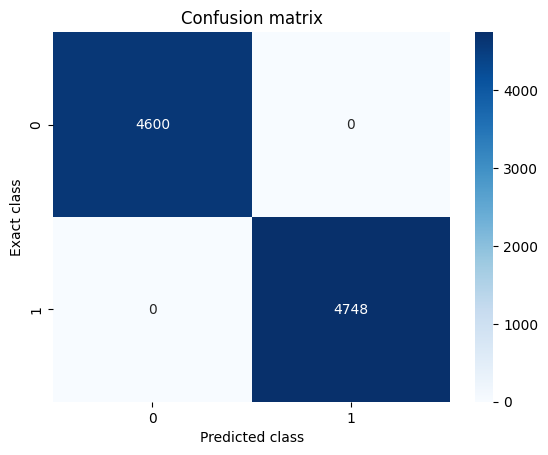

In [ ]:
#Tipo de modelos a usar
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
#Varible dependiente
y_predict = model.predict(X_test)
#Precision del score
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Logistic Regression is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');
serie = pd.Series(accuracy,index=['LogisticRegression'])
accuracy_Logmodel = pd.DataFrame({'accuracy':serie})

# visualizar el modelo entrenado

In [ ]:
entreno = model.fit(X_train,y_train)
entreno

LogisticRegression(max_iter=1000)

In [ ]:
y_predict

array([1, 0, 1, ..., 0, 1, 0])

# Guardado de datos

In [ ]:
# Ruta donde guardar el archivo en Google Drive
ruta_X_train = '/content/drive/MyDrive/Colab Notebooks/X_train.csv'

# Guardar el DataFrame como CSV
X_train.to_csv(ruta_X_train, index=False)  # index=False evita que se guarde el índice

# Ruta donde guardar el archivo en Google Drive
ruta_y_train = '/content/drive/MyDrive/Colab Notebooks/y_train.csv'
# Guardar el DataFrame como CSV
y_train.to_csv(ruta_y_train, index=False)  # index=False evita que se guarde el índice

In [ ]:
# Guardar el modelo y la lista de las columnas entrenadas en una variable
colummns_train=X_train.columns.tolist()

In [ ]:
#DATOS pkl

import pickle
# Nombre del archivo que vas a crear
modelo = '/content/drive/MyDrive/Colab Notebooks/modelo.pkl'
columnas = '/content/drive/MyDrive/Colab Notebooks/columnas_modelo.pkl'


# Escribir los datos en el archivo .pkl
with open(modelo, "wb") as archivo:  # "wb" significa "write binary"
    pickle.dump(model, archivo)

with open(columnas, "wb") as archivo2:  # "wb" significa "write binary"
    pickle.dump(colummns_train, archivo2)


In [ ]:
# Suponiendo que y_test contiene las etiquetas reales y y_predict las predicciones del modelo
confus_matrix = confusion_matrix(y_test, y_predict)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

🔹 Accuracy: 1.0000
🔹 Precision (PPV): 1.0000
🔹 Recall (Sensibilidad, TPR): 1.0000
🔹 Specificity (TNR): 1.0000
🔹 F1-Score: 1.0000


# KNeighbors Application - Aplicación de Clasificador de vecinos mas cercanos

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict = model.predict(X_test)

The accuracy of KNeighborsClassifier is 1.0000


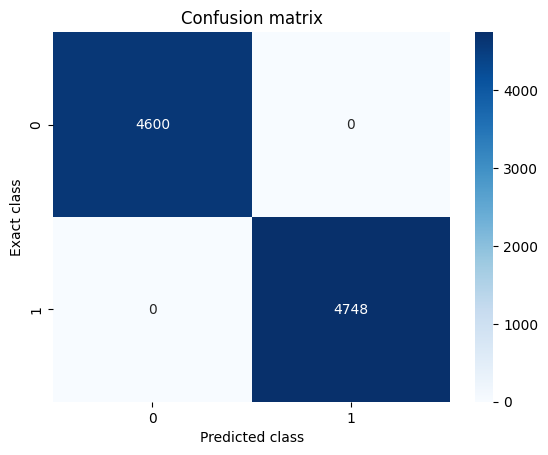

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of KNeighborsClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['KNeighborsClassifier'])
accuracy_KNmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
# Suponiendo que y_test contiene las etiquetas reales y y_predict las predicciones del modelo
confus_matrix = confusion_matrix(y_test, y_predict)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

🔹 Accuracy: 1.0000
🔹 Precision (PPV): 1.0000
🔹 Recall (Sensibilidad, TPR): 1.0000
🔹 Specificity (TNR): 1.0000
🔹 F1-Score: 1.0000


# Decision tree Application - Aplicación de Arboles de decisión

In [ ]:
model_Tree = DecisionTreeClassifier()
model_Tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict_Tree = model_Tree.predict(X_test)

The accuracy of Decision Tree is 0.9923


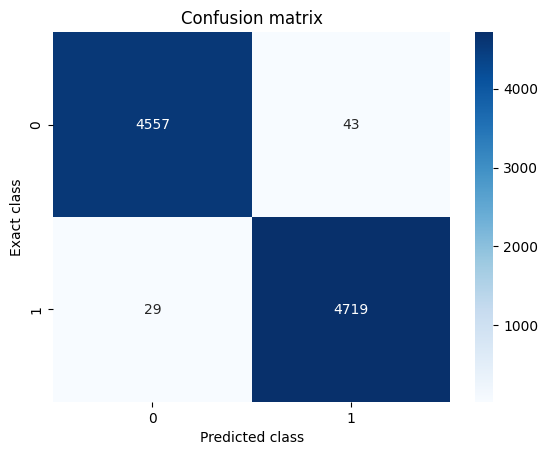

In [ ]:
accuracy = accuracy_score(y_test,y_predict_Tree)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict_Tree)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
# Suponiendo que y_test contiene las etiquetas reales y y_predict las predicciones del modelo
confus_matrix = confusion_matrix(y_test, y_predict_Tree)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict_Tree)
precision = precision_score(y_test, y_predict_Tree)
recall = recall_score(y_test, y_predict_Tree)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict_Tree)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

🔹 Accuracy: 0.9923
🔹 Precision (PPV): 0.9910
🔹 Recall (Sensibilidad, TPR): 0.9939
🔹 Specificity (TNR): 0.9907
🔹 F1-Score: 0.9924


# Prediccion por GaussianNB

The accuracy of GaussianNB is 0.7265


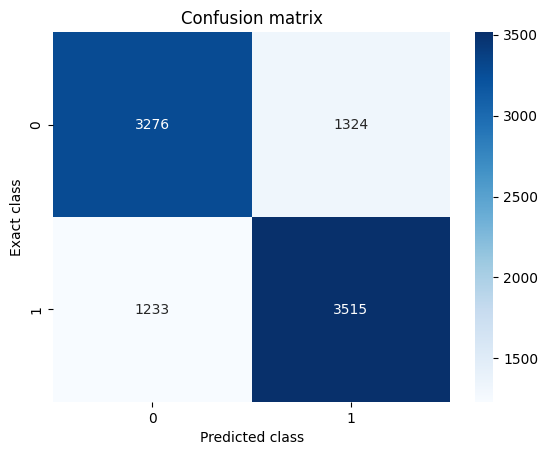

In [ ]:
#Tipo de modelos a usar
model = GaussianNB()
model.fit(X_train,y_train)
#Varible dependiente
y_predict = model.predict(X_test)
#Precision del score
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of GaussianNB is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['GaussianNB'])
accuracy_NBmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
# Suponiendo que y_test contiene las etiquetas reales y y_predict las predicciones del modelo
confus_matrix = confusion_matrix(y_test, y_predict)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

🔹 Accuracy: 0.7265
🔹 Precision (PPV): 0.7264
🔹 Recall (Sensibilidad, TPR): 0.7403
🔹 Specificity (TNR): 0.7122
🔹 F1-Score: 0.7333


# Random Forest Application - Aplicación de Bosques Aleatorios

In [ ]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_predict = model.predict(X_test)

The accuracy of RandomForestClassifier is 0.9799


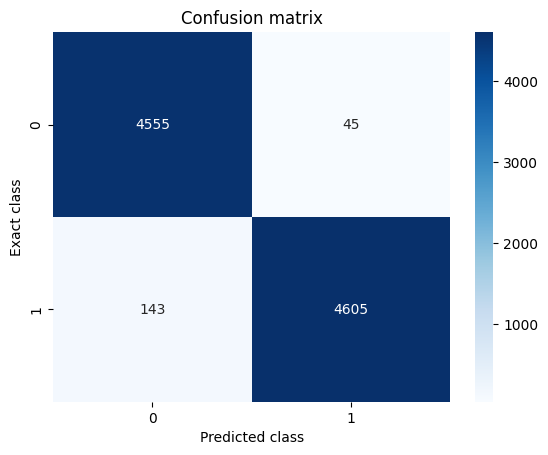

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of RandomForestClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['RandomForestClassifier'])
accuracy_RFmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
# Suponiendo que y_test contiene las etiquetas reales y y_predict las predicciones del modelo
confus_matrix = confusion_matrix(y_test, y_predict)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

🔹 Accuracy: 0.9799
🔹 Precision (PPV): 0.9903
🔹 Recall (Sensibilidad, TPR): 0.9699
🔹 Specificity (TNR): 0.9902
🔹 F1-Score: 0.9800


 Comparación del rendimiento de cada uno de los algoritmos utilizados

In [ ]:
accuracy_models = pd.concat([accuracy_Logmodel,accuracy_KNmodel,accuracy_DTmodel,accuracy_RFmodel,accuracy_NBmodel])
accuracy_models

,accuracy
LogisticRegression,1.000000
KNeighborsClassifier,1.000000
DecisionTreeClassifier,0.992298
RandomForestClassifier,0.979889
GaussianNB,0.726466
